# Ejercicio 1: Algoritmo *Naive Bayes*

Este algoritmo se caracteriza por ser extremadamente rápido de computar, y sus aplicaciones se extienden a numerosos campos de la inteligencia artificial. Sin embargo, cuenta con un gran inconveniente (presente en la hipótesis del teorema de Bayes), y es que las *features* se asumen independientes, lo cual es muy poco frecuente en la vida real (aunque puede conseguirse mediante técnicas como *PCA*).

El teorema de Bayes nos da una forma de calcular probabilidades de eventos *a posteriori* conociendo la información *a priori*:

$$ P(c|x)=\frac{P(x|c) P(c)}{P(x)} $$

En términos relacionados a nuestro contexto, podría leerse como sigue: *la probabilidad de una determinada clase dada una serie de features, es igual al producto de la probabilidad de dichas features dada una clase, por la probabilidad de dicha clase y el inverso de las features*.

Nuestro objetivo en este ejercicio será replicar el algoritmo de *Naive Bayes* con una implementación que mimetice a la de la famosa librería *scikit-learn*. Para ello, dado un cierto *array* de *features* y otro *array* con las etiquetas a predecir, debemos de calcular:

* Las probabilidades *a priori* en un método llamado `calc_prior` que se almacenen en una variable interna de la clase llamada `prior`.
* Las estadísticas de cada grupo de etiquetas (media y varianza) en un método llamado `calc_statistics` que se almacenen en una variable interna de la clase llamada `mean` y `var` respectivamente.
* La probabilidad de cada grupo. Este apartado depende de la asunción que hagamos sobre la distribución de nuestros datos; en este caso, para no distraer la atención del ejercicio, lo damos hecho (método `gaussian_density`) y asumiremos que nuestras *features* son todas continuas y se distribuyen de forma normal.
* La probabilidad *a posteriori*. Esto también lo damos hecho por simplicidad.
* Un método que nos permita sacar estos cálculos de unos determinados datos de entrenamiento. Esto también lo damos hecho por simplicidad.
* Un método que nos permita hacer predicciones en datos en los que el modelo no ha sido entrenado. Esto también lo damos hecho por simplicidad.

Partimos del conjunto de datos `iris`:

In [ ]:
# Requerimientos
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
# Cargar datos
features, target = load_iris(return_X_y = True, as_frame=True)

In [ ]:
data = pd.concat([features, target], axis = 1)

In [ ]:
data.shape

(150, 5)

In [ ]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Procedamos ahora a la implementación de los dos pequeños métodos de nuestro algoritmo:

In [ ]:
class NaiveBayesClassifier():
  
    def calc_prior(self, features, target):
        '''
        Método para calcular probabilidades a priori
        '''
        # ESCRIBE AQUÍ LAS PROBABILIDADES A PRIORI POR ETIQUETA
        self.prior = None
        return self.prior


    def calc_statistics(self, features, target):
        '''
        Calculamos media y varianza de cada columna
        '''
        # ESCRIBE AQUÍ LAS MÉTRICAS POR ETIQUETA
        self.mean = None
        self.var = None
              
        return self.mean, self.var


    def gaussian_density(self, class_idx, x):     
        '''
        calculate probability from gaussian density function (normally distributed)
        we will assume that probability of specific target value given specific class is normally distributed
        
        probability density function derived from wikipedia:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance (standard deviation)
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob


    def calc_posterior(self, x):
        posteriors = []

        # Calculamos la probabilidad posterior de cada clase
        for i in range(self.count):
            prior = np.log(self.prior[i])
            conditional = np.sum(np.log(self.gaussian_density(i, x)))
            posterior = prior + conditional
            posteriors.append(posterior)
        # Devuelve clase con mayor probabilidad a posteriori
        return self.classes[np.argmax(posteriors)]


    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)


    def predict(self, features):
        y_pred = np.array([self.calc_posterior(f) for f in features.to_numpy()])
        return y_pred

A continuación, en esta breve pieza de código podremos brevemente adelantarnos a la parte de modelización del temario para hacer predicciones con este modelo:

In [ ]:
# Método para estratificar nuestros datos
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Dividimos los datos de forma que haya la misma proporción de etiquetas en cada partición
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=.2, stratify=target)
# Instanciamos la clase anterior, entrenamos en una partición y predecimos en la otra
NBC = NaiveBayesClassifier()
NBC.fit(train_features, train_target)
predicciones = NBC.predict(test_features)
# Vemos cuál ha sido el rendimiento del modelo
print(classification_report(test_target, predicciones))

# Ejercicio 2: Máxima verosimilitud

Realice un estudio similar al de los apuntes para estimar el parámetro $\lambda$ de una distribución Poisson mediante la máxima verosimilitud. La distribución de Poisson se encuentra en multitud de fenómenos naturales y es por ello fruto de modelización en múltiples experimentos, por lo que su conocimiento es fundamental.

Para ello, siga los pasos:

* Dado que el dominio de una distribución Poisson son los números enteros no negativos, considere una serie de $n$ experimentos independientes e idénticamente distribuídos donde en cada uno de ellos resulta tener lugar el suceso $\{n_i\}_{i=0}^n$. 
* Dado que son sucesos independientes, la probabilidad conjunta se expresa como producto de probabilidades marginales.
* Aplique el logaritmo y simplifique esta expresión.
* Utilice derivadas e iguale a cero la expresión para despejar $\hat{\lambda}$.

Recuerde que la función masa de probabilidad de una distribución $X\sim \mathcal{P}(\lambda)$ es $P[X=x]=\frac{\lambda^x\cdot e^{-x}}{x!}$.

<details>
<summary>
Solución:
</summary>
\begin{array}{ccl}
\text{(1)} & &  P(X|\lambda)=\prod_{k=1}^n \frac{\lambda^{n_k}\cdot e^{-n_k}}{n_k!}\\
\text{(2)} & &  \log{(P(X|\lambda))}=\sum_{k=1}^n [n_k\cdot\log{(\lambda)} - n_k]-n\cdot (n_k!)=\left(\sum_{k=1}^n n_k\right)\cdot(\log{(\lambda)}-1)-n\cdot (n_k!)\\
\text{(3)} & &  \frac{\partial}{\partial \lambda}\log{(P(X|\lambda))}=\frac{1}{\lambda}\sum_{k=1}^n n_k=0\\
(4) & & \hat{\lambda}=\sum_{k=1}^n n_k
\end{array}
</details>

# Ejercicio 3: Valores atípicos

Construya una función que, dado un conjunto de variables continuas en forma de columnas en un objeto `pd.DataFrame`, realice los siguientes pasos para cada una de ellas:

* Calcule los percentiles 75 y 25.
* Calcule el rango intercuartílico.
* Calcule el intervalo $ \left[Q_1-1.5\cdot\text{IQR}, Q_3+1.5\cdot\text{IQR}\right] $.
* Localice los valores que no estén en este intervalo por ser **inferiores** y reemplácelos por $Q_1-1.5\cdot\text{IQR}$.
* Localice los valores que no estén en este intervalo por ser **superiores** y reemplácelos por $Q_3+1.5\cdot\text{IQR}$.

Se valorará adicionalmente a aquellos alumnos que sean capaces de añadir además que se pueda hacer un estudio de valores atípicos agrupando por variables con alta correlación con la variable respuesta.

Aplique lo anterior para analizar las variables continuas del siguiente *dataset*:

```python
# Requerimientos
import os
import pandas as pd
# Creamos carpeta
!mkdir /content/air_quality_dataset
# Movemos directorio activo
%cd /content/air_quality_dataset
# Descargamos fichero comprimido
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip
# Descargamos el fichero que contiene los datos a nuestro directorio activo
!unzip PRSA2017_Data_20130301-20170228.zip
# Nos movemos a la carpeta que contenía el zip
%cd PRSA_Data_20130301-20170228
# Leemos todos los archivos en una línea
df = pd.concat([pd.read_csv(elem) for elem in os.listdir()]).reset_index(drop=True)
```

In [ ]:
# Requerimientos
import os
import pandas as pd

# Creamos carpeta
!mkdir /content/air_quality_dataset

# Movemos directorio activo
%cd /content/air_quality_dataset

# Descargamos fichero comprimido
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip

# Descargamos el fichero que contiene los datos a nuestro directorio activo
!unzip PRSA2017_Data_20130301-20170228.zip

# Nos movemos a la carpeta que contenía el zip
%cd PRSA_Data_20130301-20170228

# Leemos todos los archivos en una línea
df = pd.concat([pd.read_csv(elem) for elem in os.listdir()]).reset_index(drop=True)

In [ ]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
420764,35061,2017,2,28,20,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
420765,35062,2017,2,28,21,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
420766,35063,2017,2,28,22,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng


In [ ]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [ ]:
def detectar_outliers(data: pd.DataFrame, columnas_limpiar: list) -> pd.DataFrame:
    """Esta función recibe un dataframe y una serie de columnas 
    sobre las que se quiere hacer un tratamiento de las variables
    de tipo numérico.

    Args:
        data (pd.DataFrame): Dataframe sobre el que se quiere hacer el tratamiento.
        columnas_limpiar list[str]: lista de strings con las columnas que se quieren limpiar.

    Returns:
        pd.DataFrame: Dataframe con las columnas limpias.
        
    Usage:
    
    >>> df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [1, 2, 3, 4, 5]})
    >>> detectar_outliers(df, ['A', 'B'])
    """
    import numpy as np
    
    try:

        assert(any(data[columnas_limpiar].dtypes.values != 'float64') == False)
        
        for variable in columnas_limpiar:
            
            # calcula Q1 y Q3.
            Q1 = data[variable].quantile(0.25)
            Q3 = data[variable].quantile(0.75)
            
            # Rango Intercuartíl.
            IQR = Q3 - Q1
            
            # calcula los límites de los outliers.
            upper_limit = Q3+1.5*IQR
            lower_limit = Q1-1.5*IQR
            
            # Genera un vector con los nuevos valores de la variable.
            eliminar_outliers = np.where(
                data[variable] > upper_limit, upper_limit,
                    np.where(
                        data[variable] < lower_limit, lower_limit, data[variable]
                            )
                    )
            
            # Reemplaza los valores de la variable por los nuevos.
            data[variable] = eliminar_outliers
            
    except:
        
        raise Exception('Alguna variable no es de tipo float.')

In [ ]:
# Otras versión sin acabar

def clean_df():

    #Calcule los percentiles 75 y 25.

    per75 = df.quantile(q = 0.75)

    per25 = df.quantile(q = 0.25)

    #Calcule el rango intercuartílico.

    iqr = per75 - per25

    #Calcule el intervalo [𝑄1−1.5⋅IQR,𝑄3+1.5⋅IQR] .

    low, high = per25-1.5*iqr, per75 +1.5*iqr

    print(low)

    #Localice los valores que no estén en este intervalo por ser inferiores y reemplácelos por 𝑄1−1.5⋅IQR .

    #Localice los valores que no estén en este intervalo por ser superiores y reemplácelos por 𝑄3+1.5⋅IQR .

    print(df.replace(df[df<low],low))

    df.replace(df[df>high],high)

    print(df)



    clean_df()

# Ejercicio 4: Correlación

Implemente un método que tenga los siguientes pasos:

* Cree una matriz de correlación de las vriables continuas de un *dataset* y lo compare a la variable respuesta.
* Si hay dos variables altamente correlacionadas, elimine del *dataset* la variable que menos correlacionada esté con la variable respuesta.

Para ello, come como referencia el siguiente *dataset*:

```python
# Dependencias
import pandas as pd
# Descargamos el fichero que contiene los datos a nuestro directorio activo
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00514/Bias_correction_ucl.csv
# Leemos fichero
df = pd.read_csv('Bias_correction_ucl.csv')
```

Tome como variable respuesta `Next_Tmax`.

In [ ]:
# Dependencias
import pandas as pd
# Descargamos el fichero que contiene los datos a nuestro directorio activo
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00514/Bias_correction_ucl.csv
# Leemos fichero
df = pd.read_csv('Bias_correction_ucl.csv')

--2022-06-22 15:44:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/00514/Bias_correction_ucl.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658519 (1.6M) [application/x-httpd-php]
Saving to: ‘Bias_correction_ucl.csv’

Bias_correction_ucl 100%[===================>]   1.58M  4.05MB/s    in 0.4s    

2022-06-22 15:44:28 (4.05 MB/s) - ‘Bias_correction_ucl.csv’ saved [1658519/1658519]



In [ ]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


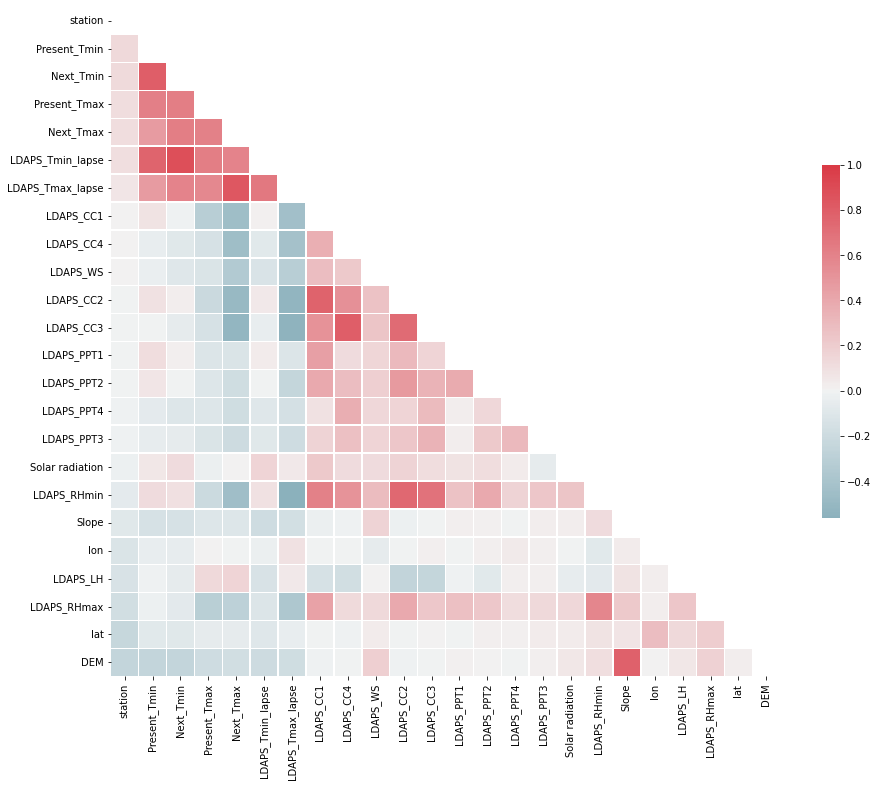

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

corr = df.corr(method = 'pearson').sort_values(by = 'station', axis = 0, ascending = False).sort_values(by = 'station', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,13))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.iloc[0:37,0:37], mask=mask[0:37,0:37], cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = False)

In [ ]:
corr = df.corr()

corr = corr[(np.abs(corr)>0.85) & (np.abs(corr) < 1)]

result = corr[corr.columns[~corr.isnull().all()]]

In [ ]:
result

,LDAPS_Tmin_lapse,Next_Tmin
station,NaN,NaN
Present_Tmax,NaN,NaN
Present_Tmin,NaN,NaN
LDAPS_RHmin,NaN,NaN
LDAPS_RHmax,NaN,NaN
LDAPS_Tmax_lapse,NaN,NaN
LDAPS_Tmin_lapse,NaN,0.886964
LDAPS_WS,NaN,NaN
LDAPS_LH,NaN,NaN
LDAPS_CC1,NaN,NaN
